In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation

def burgers_flux(ul, ur):
    return 0.5*(0.5*ul**2 + 0.5*ur**2) # Flux function for Burgers equation


def minmod(a, b):
    return np.where(np.abs(a) < np.abs(b), a, b)

def initial_conditions(nx):
    # Define initial conditions for Burgers equation
    # x = np.linspace(0, 1, nx)
    return np.array([i for i in range(nx)])

def step(nx,dt,u) :
    vecU  = np.zeros_like(u) #initialisation du nouveau vecteur des vitesses
    dx = 1/nx
    for i in range(1, nx - 1):
        ul, ur = u[i - 1], u[i + 1]
        flux_l = burgers_flux(ul, u[i])
        flux_r = burgers_flux(u[i], ur)
        vecU[i] = u[i] - dt / dx * (flux_l - flux_r)
    return vecU

def solve_burgers(nx, t_end, dt):
    # Solve Burgers equation using a simple finite volume method

    # Initialize grid and initial conditions
    x = np.linspace(0, 1, nx)
    dx = x[1] - x[0]
    matU = np.zeros([int(t_end//dt+1),nx])
    matU[0] = initial_conditions(nx)

    # Time-stepping
    t = 0.0
    i = 1
    while t < t_end:

        u_new = step(nx,dt,matU[i-1])
        matU[i] = u_new.copy()
        t += dt
        i += 1

    return x, matU

def plot_solution(x, u):
    plt.plot(x, u, label='Numerical Solution')
    plt.title('Burgers Equation - Finite Volume Method')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.show()





C:\Users\vbarr\AppData\Local\Temp\ipykernel_23936\3968575730.py:7: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(0.5*ul**2 + 0.5*ur**2) # Flux function for Burgers equation
C:\Users\vbarr\AppData\Local\Temp\ipykernel_23936\3968575730.py:25: RuntimeWarning: invalid value encountered in double_scalars
  vecU[i] = u[i] - dt / dx * (flux_l - flux_r)


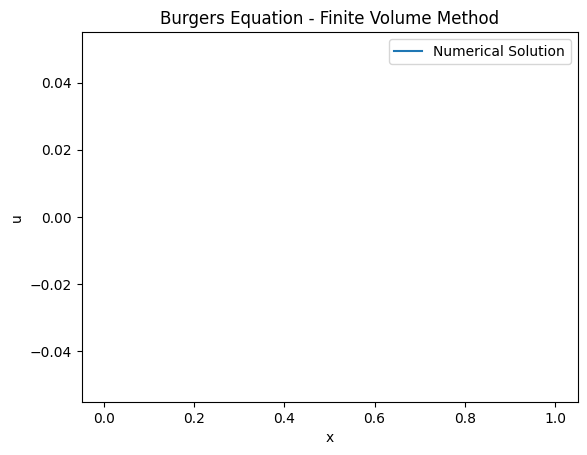

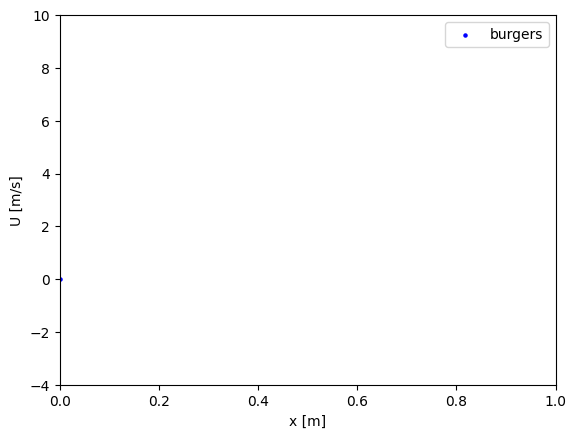

In [6]:


def main():
    # Define the computational domain
    xmin, xmax = 0.0, 1.0
    nx = 100  # Number of cells

    # Solve Burgers equation
    t_end = 0.2
    dt = 0.001
    x, u = solve_burgers(nx, t_end, dt)

    # Plot the solution
    plot_solution(x, u[-2])

    #animate solution
    

    fig, ax = plt.subplots()
    t = np.linspace(0,t_end,int(t_end//dt))
    scat = ax.scatter(0, u[0,0], c="b", s=5,label='burgers')
    ax.set(xlim=[0, 1], ylim=[-4, 10], xlabel='x [m]', ylabel='U [m/s]')
    ax.legend()
   
    def update(frame):
        # for each frame, update the data stored on each artist.
        y = u[frame,:]
        # update the scatter plot:
        data = np.stack([x, y]).T
        scat.set_offsets(data)
        # update the line plot:
        return (scat)
    ani = FuncAnimation(fig=fig, func=update, frames=20, interval=1)
    plt.show() 



if __name__ == "__main__":
    main()
